In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import opengm

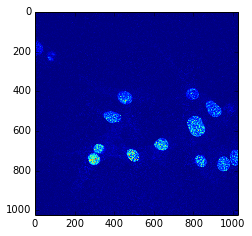

In [43]:
img_cores = plt.imread('zellen_franziska/C1-2C2C12_proliferierend2_scaled.png')[:,:,2] * 255.

dimx = img_cores.shape[1]
dimy = img_cores.shape[0]
numLabels = 2
numVar = dimx*dimy

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax1.imshow(img_cores)


In [ ]:
# Building up graphical model

numberOfStates = np.ones(numVar, dtype=opengm.index_type)*numLabels
gm = opengm.graphicalModel(numberOfStates, operator='adder')

varIndex = lambda x, y: x*dimy + y

In [69]:
# unary factors

fg_average = 35.
bg_average = 0.

for y in range(dimy):
    for x in range(dimx):
        fid = gm.addFunction(np.array([np.abs(fg_average - img[y, x]), np.abs(bg_average - img[y, x])]))
        gm.addFactor(fid, varIndex(x, y))


In [70]:
solver = opengm.inference.AlphaExpansion(gm)
solver.infer()
argmin = solver.arg()
segm_unaryOnly = argmin.reshape(dimx,dimy).transpose()

In [71]:
# smoothness factors

C = 30.
f = (np.eye(numLabels, k=1) + np.eye(numLabels, k=-1))*C

fid = gm.addFunction(f)

for y in range(dimy):
    for x in range(dimx):
        if (x+1 < dimx):
            gm.addFactor(fid, [varIndex(x,y), varIndex(x+1,y)])
        if (y+1 < dimy):
            gm.addFactor(fid, [varIndex(x,y), varIndex(x,y+1)])

In [72]:
solver = opengm.inference.AlphaExpansion(gm)
solver.infer()
argmin = solver.arg()
segm_smooth = argmin.reshape(dimx,dimy).transpose()

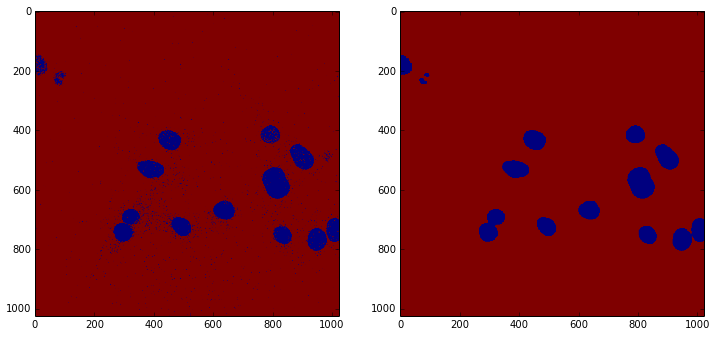

In [73]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(121)
ax1.imshow(segm_unaryOnly)

ax2 = fig.add_subplot(122)
ax2.imshow(segm_smooth)